In [5]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import field
import spatial
import timesteppers
import equations
import equationsBC
import equations3

In [6]:
def plot_2D_field(xm, ym, data):
    fig = plt.figure(figsize=(4,3))
    ax = fig.add_subplot(111)
    pcm = ax.pcolormesh(xm, ym, data)
    ax.set_aspect(1)
    fig.colorbar(pcm)
    ax.set_xlabel('x')
    ax.set_ylabel('y')

<IPython.core.display.Javascript object>


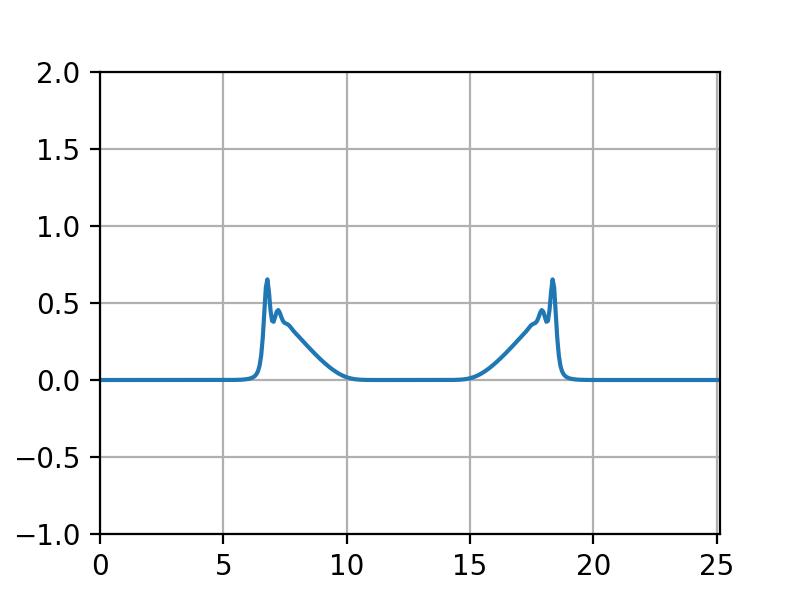

In [7]:
resolution=400
end_point = 8*np.pi
grid_x = field.UniformPeriodicGrid(resolution, end_point)
domain = field.Domain([grid_x])
x, = domain.values()

BT = 2#np.sin(x) + 1.5
IC = np.exp( -(x-4*np.pi)**2 )

h = field.Field(domain)
u = field.Field(domain)
H = field.Field(domain)

X = field.FieldSystem([u,h])
h.data[:] = IC
u.data[:] = 0*IC
H.data[:] = BT

g = 9.81
f = 0.5
b = 0

alpha = 0.005

sw_problem = equations4.SWFull1D(X, 2, g=g, f=f, b=b, H=H)
dt = alpha*grid_x.dx


output_cadence = 10
fig = plt.figure(figsize=(4,3))
p, = plt.plot(x, h.data)
plt.grid()
plt.xlim([0, end_point])
plt.ylim([-1,2])
fig.canvas.draw()
while sw_problem.t < 1 - 1e-5:
    sw_problem.step(dt)
    if sw_problem.iter % output_cadence == 0:
        p.set_ydata(h.data)
        fig.canvas.draw()
#         print(sw_problem.t)

# plt.plot(x, IC)

/Users/richardsuhendra/opt/miniconda3/lib/python3.8/site-packages/scipy/sparse/_index.py:124: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


<IPython.core.display.Javascript object>


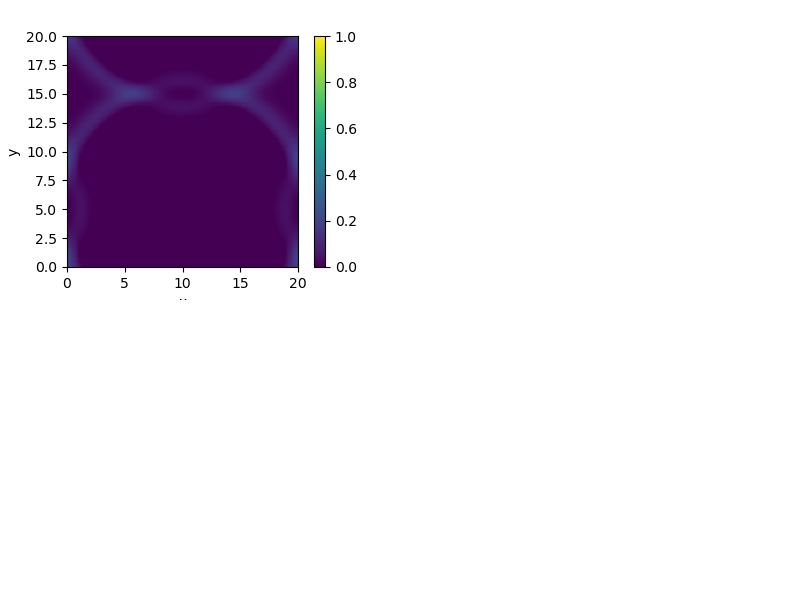

In [ ]:
resolution=200
grid_x = field.UniformPeriodicGrid(resolution, 20)
grid_y = field.UniformPeriodicGrid(resolution, 20)
domain = field.Domain((grid_x, grid_y))
x, y = domain.values()

# BT = np.sin(x/2)*np.sin(y/2) + 1.5
# BT = (0.1*x + 1) * (0.1*y + 1)
BT = 2

# IC = np.exp( - ( (x-np.pi)**2 + (y-np.pi)**2 ) )
IC = np.exp( - ( (x-10)**2 + (y-5)**2 ) )
# IC += np.exp( - ( (x-15)**2 + (y-15)**2 ) )
# IC += np.exp( - ( (x-10)**2 + (y-18)**2 ) )
# IC += np.exp( - ( (x-2)**2 + (y-7)**2 ) )
#IC += np.exp( - ( (x-10)**2 + (y-10)**2 ) )
#IC += np.exp( - ( (x-10)**2 + (y-15)**2 ) )


h = field.Field(domain)
u = field.Field(domain)
v = field.Field(domain)
H = field.Field(domain)

X = field.FieldSystem([u,v,h])

h.data[:] = IC
u.data[:] = 0*IC 
v.data[:] = 0*IC
H.data[:] = BT

g = 9.81
nu = 0
f = 0
b = 0

alpha = 0.05

sw = equations.linearSW(X, 2, g, f,b,H)
sw_problem=timesteppers.PredictorCorrector(sw)
dt = alpha*grid_x.dx

xm, ym = domain.plotting_arrays()

fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot(111)
pcm = ax.pcolormesh(xm, ym, h.data)
ax.set_aspect(1)
fig.colorbar(pcm)
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.canvas.draw()
while sw_problem.t < 5 - 1e-5:
    sw_problem.step(dt)
    if sw_problem.iter % 10 == 0:
        pcm.set_array(np.ravel(h.data))
        #pcm.set_clim([0,np.max(h.data)])
        #print(np.max(h.data))
        fig.canvas.draw()
print('done')